In [166]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("../data/mouse_drug_data.csv")
mouse_data.head()
clinical_data = pd.read_csv("../data/clinicaltrial_data.csv")
clinical_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, clinical_data)
combined_data.head()
# Display the data table for preview


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [167]:
del combined_data['Mouse ID']

In [168]:
del combined_data['Metastatic Sites']

In [169]:
combined_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [170]:
Mean_tumor_data = combined_data.groupby(['Drug','Timepoint'])
Mean_tumor_data.head()
Mean_tumor_data1 = Mean_tumor_data['Tumor Volume (mm3)'].mean()
Mean_tumor_data1.head()
tumor_data_pd = pd.DataFrame(Mean_tumor_data1)
tumor_data_pd=tumor_data_pd.reset_index()
tumor_data_pd

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [171]:
Mean_tumor_data = combined_data.groupby(['Drug','Timepoint'])
Standard_Error = Mean_tumor_data.sem()
Standard_Error = Standard_Error.reset_index()
Standard_Error.head()
Standard_Error = pd.DataFrame(Standard_Error)
Standard_Error_pd = Standard_Error.reset_index()
Standard_Error_pd = Standard_Error_pd.pivot(index="Timepoint",columns="Drug")['Tumor Volume (mm3)']
Standard_Error_pd.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [174]:
tumor_data_pd = tumor_data_pd.reset_index()
tumor_data_clean = tumor_data_pd.pivot(index="Timepoint",columns="Drug")['Tumor Volume (mm3)']
tumor_data_clean.head()
tumor_data_clean = pd.DataFrame(tumor_data_clean)
tumor_data_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


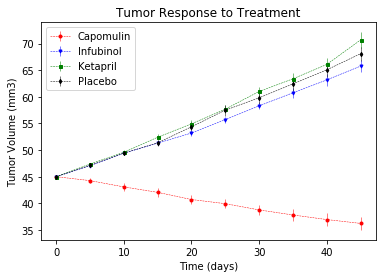

In [197]:
#Plots with Error Bars Included 
plt.errorbar(tumor_data_clean.index, tumor_data_clean["Capomulin"], yerr=Standard_Error_pd["Capomulin"], color="red", marker="o", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_data_clean.index, tumor_data_clean["Infubinol"], yerr=Standard_Error_pd["Infubinol"], color="blue", marker="v", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_data_clean.index, tumor_data_clean["Ketapril"], yerr=Standard_Error_pd["Ketapril"], color="green", marker="s", markersize=3, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_data_clean.index, tumor_data_clean["Placebo"], yerr=Standard_Error_pd["Placebo"], color="black", marker="d", markersize=3, linestyle="dashed", linewidth=0.5)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="upper left")
plt.savefig("pymaceuticals_1.png")

In [ ]:
## Metastatic Response to Treatment